In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [9]:
data = load_iris()

X = data.data[:,2:]
y = data.target

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion='entropy')
dt_clf.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, alpha=0.75, cmap=custom_cmap)

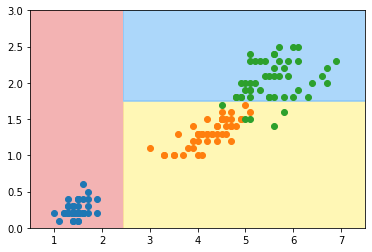

In [12]:
plot_decision_boundary(dt_clf,[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

## 模拟信息熵的划分

In [13]:
def split(X,y,d,value):
    index_a = (X[:,d]<=value)
    index_b = (X[:,d]>value)
    
    return X[index_a],X[index_b],y[index_a],y[index_b]


In [14]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num/len(y)
        res += -p*log(p)
        
    return res

In [18]:
def try_split(X,y):
    
    best_entropy=float('inf')
    best_d, best_v = -1,-1
    
    for d in range(X.shape[1]):
        sorted_arg = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_arg[i-1],d]!=X[sorted_arg[i],d]:
                v = (X[sorted_arg[i-1],d]+X[sorted_arg[i],d])/2
                X_l,X_r,y_l,y_r = split(X,y,d,v)
                e = entropy(y_l)+entropy(y_r)
                if e < best_entropy:
                    best_entropy=e
                    best_d = d
                    best_v = v
                    
    return best_entropy,best_d,best_v

In [25]:
best_entropy,best_d,best_v = try_split(X,y)
print("best_entropy=", best_entropy)
print("best_d:",best_d)
print("best_v:",best_v)

best_entropy= 0.6931471805599453
best_d: 0
best_v: 2.45


In [27]:
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)

In [28]:
entropy(y1_l)

0.0

In [29]:
entropy(y1_r)

0.6931471805599453

In [30]:
try_split(X1_r,y1_r)

(0.4132278899361904, 1, 1.75)

In [31]:
X2_l,X2_r,y2_l,y2_r = split(X1_r,y1_r,1,1.75)

In [32]:
entropy(y2_l)

0.30849545083110386

In [33]:
entropy(y2_r)

0.10473243910508653

<font size=5>

## 决策树的另一个评价指标：基尼系数

$$g = 1-\sum_{i=1}^{k}{p_i^2}$$
    
基尼系数比信息熵计算速度更快

基尼系数与信息熵一般没有性能上的差别
    
sklearn中默认使用基尼系数

In [42]:
def split(X,y,d,value):
    index_a = (X[:,d]<=value)
    index_b = (X[:,d]>value)
    
    return X[index_a],X[index_b],y[index_a],y[index_b]


from collections import Counter
from math import log

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num/len(y)
        res -= p**2
        
    return res

def try_split_gini(X,y):
    
    best_g=float('inf')
    best_d, best_v = -1,-1
    
    for d in range(X.shape[1]):
        sorted_arg = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_arg[i-1],d]!=X[sorted_arg[i],d]:
                v = (X[sorted_arg[i-1],d]+X[sorted_arg[i],d])/2
                X_l,X_r,y_l,y_r = split(X,y,d,v)
                g = gini(y_l)+gini(y_r)
                if g < best_g:
                    best_g=g
                    best_d = d
                    best_v = v
                    
    return best_entropy,best_d,best_v

In [45]:
best_g,best_d,best_v = try_split_gini(X,y)

In [46]:
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)

In [47]:
gini(y1_l)

0.0

In [48]:
gini(y1_r)

0.5

In [49]:
try_split_gini(X1_r,y1_r)

(0.6931471805599453, 1, 1.75)

In [50]:
X2_l,X2_r,y2_l,y2_r = split(X1_r,y1_r,1,1.75)

In [51]:
gini(y2_l)

0.1680384087791495

In [52]:
gini(y2_r)

0.04253308128544431